In [5]:
df = pd.read_excel('./data/00_original_data/isolates_info_201910.xls')
df.head()

,Isolate_Id,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id,HE Segment_Id,...,PB2 INSDC_Upload,PB1 INSDC_Upload,PA INSDC_Upload,HA INSDC_Upload,NP INSDC_Upload,NA INSDC_Upload,MP INSDC_Upload,NS INSDC_Upload,HE INSDC_Upload,P3 INSDC_Upload
0,EPI_ISL_766056,EPI1839523|A/falcon/England/041976/2020,EPI1839524|A/falcon/England/041976/2020,EPI1839525|A/falcon/England/041976/2020,EPI1839526|A/falcon/England/041976/2020,EPI1839527|A/falcon/England/041976/2020,EPI1839528|A/falcon/England/041976/2020,EPI1839529|A/falcon/England/041976/2020,EPI1839530|A/falcon/England/041976/2020,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EPI_ISL_984690,EPI1883026|A/peregrine falcon/Denmark/14596-1/...,EPI1883027|A/peregrine falcon/Denmark/14596-1/...,EPI1883028|A/peregrine falcon/Denmark/14596-1/...,EPI1883029|A/peregrine falcon/Denmark/14596-1/...,EPI1883030|A/peregrine falcon/Denmark/14596-1/...,EPI1883031|A/peregrine falcon/Denmark/14596-1/...,EPI1883032|A/peregrine falcon/Denmark/14596-1/...,EPI1883033|A/peregrine falcon/Denmark/14596-1/...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EPI_ISL_668456,EPI1814724|A/Peregrine falcon/Sweden/SVA201117...,EPI1814725|A/Peregrine falcon/Sweden/SVA201117...,EPI1814726|A/Peregrine falcon/Sweden/SVA201117...,EPI1814727|A/Peregrine falcon/Sweden/SVA201117...,EPI1814728|A/Peregrine falcon/Sweden/SVA201117...,EPI1814729|A/Peregrine falcon/Sweden/SVA201117...,EPI1814730|A/Peregrine falcon/Sweden/SVA201117...,EPI1814731|A/Peregrine falcon/Sweden/SVA201117...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EPI_ISL_2932612,NaN,NaN,NaN,EPI1882551|A/goose/Ayyrtausky/7-20-B-Talg-12/2020,NaN,EPI1882550|A/goose/Ayyrtausky/7-20-B-Talg-12/2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EPI_ISL_2932600,NaN,NaN,NaN,EPI1882525|A/goose/Umtyl/4-190-20-B-H5N8-1/2020,NaN,EPI1882526|A/goose/Umtyl/4-190-20-B-H5N8-1/2020,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df[['Isolate_Submitter', 'Submitting_Lab']].drop_duplicates(keep='first').to_csv('acknowledge_table.csv', sep='\t')

In [6]:
df.columns

Index(['Isolate_Id', 'PB2 Segment_Id', 'PB1 Segment_Id', 'PA Segment_Id',
       'HA Segment_Id', 'NP Segment_Id', 'NA Segment_Id', 'MP Segment_Id',
       'NS Segment_Id', 'HE Segment_Id', 'P3 Segment_Id', 'Isolate_Name',
       'Subtype', 'Lineage', 'Passage_History', 'Location', 'Host',
       'Isolate_Submitter', 'Submitting_Lab', 'Submitting_Sample_Id',
       'Authors', 'Publication', 'Originating_Lab', 'Originating_Sample_Id',
       'Collection_Date', 'Note', 'Update_Date', 'Submission_Date',
       'Antigen_Character', 'Animal_Vaccin_Product',
       'Adamantanes_Resistance_geno', 'Oseltamivir_Resistance_geno',
       'Zanamivir_Resistance_geno', 'Peramivir_Resistance_geno',
       'Other_Resistance_geno', 'Adamantanes_Resistance_pheno',
       'Oseltamivir_Resistance_pheno', 'Zanamivir_Resistance_pheno',
       'Peramivir_Resistance_pheno', 'Other_Resistance_pheno', 'Host_Age',
       'Host_Age_Unit', 'Host_Gender', 'Patient_Status', 'Zip_Code',
       'Outbreak', 'Pathogen_T

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
from datetime import datetime
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, IndexLocator, FixedLocator)
import matplotlib.dates as mdates
import matplotlib as mpl
from sklearn.neighbors import KernelDensity
from datetime import timedelta, datetime
import random

In [67]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib.colors import to_hex
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [97]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, emptycols=0):

    cell_width = 150
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    names = list(colors)

#     n = len(names)
#     ncols = 4 - emptycols
#     nrows = n // ncols + int(n % ncols > 0)

    n = len(names)
    ncols = n
    nrows = 1
    
    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi, constrained_layout=False)
    fig.subplots_adjust(margin/width, margin/height, (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=name, edgecolor='0.7')
        )

    return fig

In [24]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [168]:
plt.style.use('plot_style.txt')

# Genome data

In [5]:
# * read genotype file
genotype = pd.read_csv('./genotype.csv', sep='\t', index_col=9)

# * read metadata file
metainfo = pd.read_csv('./dataset1_metainfo3.csv', sep='\t', index_col=0)[['Isolate_Name', 'Subtype', 'Host', 'host2', 'Collection_Date', 'Region', 'Country', 'Province', 'Subregion', 'Latitude', 'Longitude']]
metainfo = metainfo.join(genotype['group']).reset_index()
metainfo['Collection_Date2'] = pd.to_datetime(metainfo['Collection_Date'])
metainfo['Collection_Date3'] = metainfo['Collection_Date2'].map(lambda x: x.to_period('M'))
group_map = {
    '1_1_1_1_1_1_1_1': 'G1', '2_2_1_1_2_1_1_1': 'G1R1', '3_2_2_1_2_1_1_2': 'G1R2', '1_1_1_1_2_1_1_1': 'G1R3', '3_5_1_1_2_1_1_1': 'G1other', '3_1_2_1_2_1_1_1': 'G1other', 
    '0_0_0_0_0_0_0_0': 'G0', '4_2_3_0_3_2_0_0': 'G0R1', '0_0_5_0_0_0_0_0': 'G0other', '5_4_4_0_4_0_3_3': 'G0other', '6_3_6_0_5_0_2_4': 'G0other'
}

metainfo['group2'] = metainfo['group'].map(group_map)

def date2num(x):
    dt = datetime.strptime(x, '%Y-%m-%d')
    return int(dt.strftime('%Y')) + int(dt.strftime('%j')) / 365

def num2date(x):
    xs, zs = math.modf(float(x))
    day = round(xs * 365)
    dt = datetime.strptime(f'{int(zs)}.{day}', '%Y.%j')
    return dt.strftime('%Y-%m-%d')

metainfo['Collection_Date4'] = metainfo['Collection_Date2'].map(lambda x: date2num(x.strftime('%Y-%m-%d')))
metainfo.head()

,Isolate_Id,Isolate_Name,Subtype,Host,host2,Collection_Date,Region,Country,Province,Subregion,Latitude,Longitude,group,Collection_Date2,Collection_Date3,group2,Collection_Date4
0,EPI_ISL_766056,A/falcon/England/041976/2020,A / H5N8,Falcon,Other,2020-12-14,Europe,United Kingdom,Derbyshire,West_Europe,53.10,-1.56,0_0_0_0_0_0_0_0,2020-12-14,2020-12,G0,2020.956164
1,EPI_ISL_984690,A/peregrine falcon/Denmark/14596-1/2020,A / H5N8,Falco peregrinus,Other,2020-11-06,Europe,Denmark,Region Syddanmark,North_Europe,55.33,9.09,0_0_0_0_0_0_0_0,2020-11-06,2020-11,G0,2020.852055
2,EPI_ISL_984691,A/common buzzard/Denmark/14600-1/2020,A / H5N8,Buteo buteo,Other,2020-11-06,Europe,Denmark,Region Syddanmark,North_Europe,55.33,9.09,0_0_0_0_0_0_0_0,2020-11-06,2020-11,G0,2020.852055
3,EPI_ISL_984680,A/black-headed gull/Denmark/14139-4/2020,A / H5N8,Chroicocephalus ridibundus,Seabird,2020-11-04,Europe,Denmark,Region Syddanmark,North_Europe,55.33,9.09,0_0_0_0_0_0_0_0,2020-11-04,2020-11,G0,2020.846575
4,EPI_ISL_984692,A/barnacle goose/Denmark/14600-2/2020,A / H5N8,Branta leucopsis,Waterfowl,2020-11-07,Europe,Denmark,Region Syddanmark,North_Europe,55.33,9.09,0_0_0_0_0_0_0_0,2020-11-07,2020-11,G0,2020.854795


## genomes information for host

### number of sampling genomes by host and time

In [111]:
color_palette_rgb = [(136, 140, 160), (170, 185, 163), (229, 185, 152), (76, 134, 82), (233, 198, 85), (203, 97, 61), (132, 35, 22)]

color_palette = list(map(to_hex, [[i/256 for i in item] for item in color_palette_rgb]))
color_palette = color_palette[::-1]
color_palette[3] = '#3C5488'

In [138]:
color_palette

['#832316', '#ca613d', '#e8c555', '#3C5488', '#e4b897', '#a9b8a2', '#878b9f']

In [112]:
color_palette2 = ['#d12743', '#f7b395', '#ee9d30', '#ecce3f', '#2c88bd', 'dimgray']
color_palette3 = ['#DC0000', '#E64B35', '#00A087', '#F39B7F', '#B09C85', '#3C5488', '#4DBBD5', '#8491B4']
color_palette4 = ['#3488ab', '#ee9d30', '#ecce3f', '#729461', '#be7a3a', '#aa3c4d', '#b06faa', '#73757c']
color_palette5 = ['#3488ab', '#ee9d30', '#729461', '#be7a3a', '#73757c', '#BC3C29', '#b06faa', '#73757c']

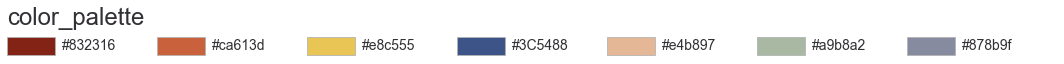

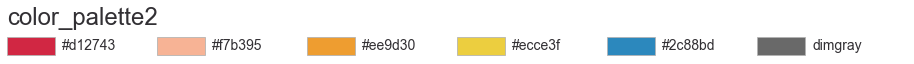

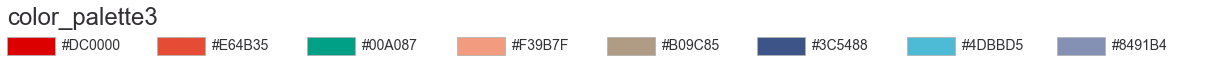

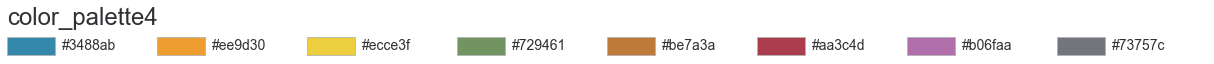

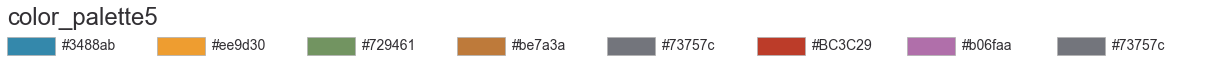

In [113]:
plot_colortable(color_palette, "color_palette")
plot_colortable(color_palette2, "color_palette2")
plot_colortable(color_palette3, "color_palette3")
plot_colortable(color_palette4, "color_palette4")
plot_colortable(color_palette5, "color_palette5")
plt.show()

In [115]:
color_palette

['#832316', '#ca613d', '#e8c555', '#3C5488', '#e4b897', '#a9b8a2', '#878b9f']

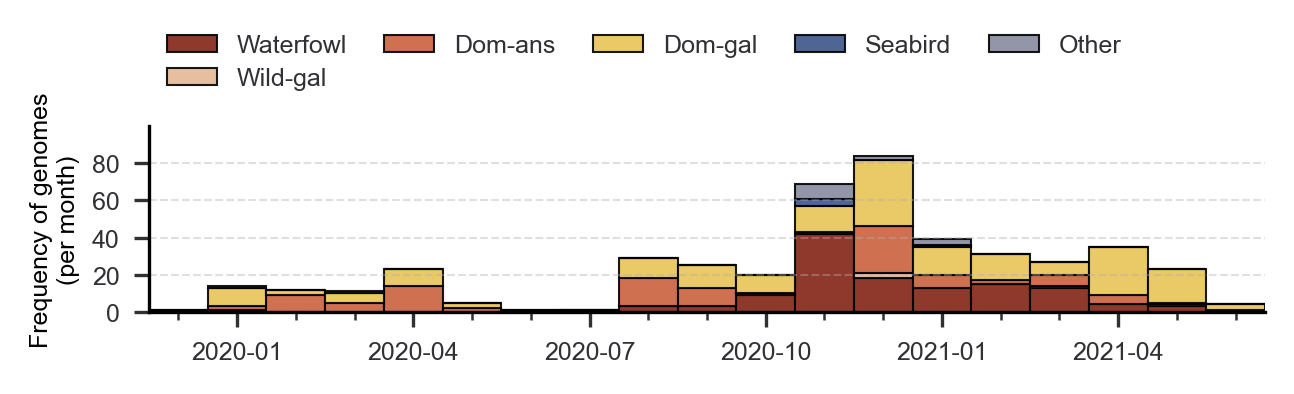

In [132]:
host_l = ['Waterfowl', 'Wild-gal', 'Dom-ans', 'Dom-gal', 'Seabird', 'Other']
host_color = ['#832316', '#e4b897', '#ca613d', '#e8c555', '#3C5488', '#878b9f']

host_cmap = dict(zip(host_l, host_color))

countByWeek = pd.crosstab(metainfo.Collection_Date3, metainfo['host2'])[host_l]
cumCountByWeek = countByWeek.cumsum(axis=1)
numWeek, numHost = countByWeek.shape

x = 0.5 + np.arange(numWeek)
fig, ax = plt.subplots(figsize=(4.2, 1.2), dpi=300, facecolor='#FFFFFF', constrained_layout=True)
for i, host in enumerate(host_l):
    y = countByWeek.loc[:, host]
    if i == 0:
        ax.bar(x, y, width=1, facecolor=host_cmap[host],linewidth=0.5, alpha=.9, label=host, edgecolor='black')
    else:
        y_ = cumCountByWeek.iloc[:, i-1]
        ax.bar(x, y, width=1, bottom=y_, facecolor=host_cmap[host], linewidth=0.5, alpha=.9, label=host, edgecolor='black')

ax.legend(loc='lower left', bbox_to_anchor=(0, 1.1) ,fontsize=6, frameon=False, ncol=5)
ax.set_ylabel('Frequency of genomes\n(per month)', fontsize=6)

ax.xaxis.set_major_locator(FixedLocator(np.arange(1.5, numWeek, 3)))
ax.xaxis.set_minor_locator(FixedLocator(np.arange(0.5, numWeek, 1)))

# ax.xaxis.set_major_formatter(format_fn)
ax.set_xticklabels(['2020-01', '2020-04', '2020-07', '2020-10', '2021-01', '2021-04'], fontsize=6)
# plt.setp(ax.get_xticklabels(), rotation=15)
ax.set_xmargin(0)
ax.set_yticks(np.arange(0, 100, 20))
ax.set_yticklabels(np.arange(0, 100, 20), fontsize=6)
ax.grid(axis='y', linestyle='--', linewidth=.5, alpha=.4)

# plt.show()
# fig.savefig('./results/fig1b.pdf')
plt.savefig('./results/fig1b.pdf', dpi=300)


***Fig 1b Frequency of genomes by month***

### wild birds in first wave

In [12]:
metainfo[(metainfo.Collection_Date2 < datetime(2020, 7, 1)) & (metainfo.host2.isin(['Waterfowl', 'Wild-gal', 'Seabird', 'Other']))]

,Isolate_Id,Isolate_Name,Subtype,Host,host2,Collection_Date,Region,Country,Province,Subregion,Latitude,Longitude,group,Collection_Date2,Collection_Date3,group2,Collection_Date4
283,EPI_ISL_417414,A/buzzard/Germany-SN/AI00285/2020,A / H5N8,Avian,Other,2020-03-20,Europe,Germany,Saxony,West_Europe,51.10,13.20,1_1_1_1_1_1_1_1,2020-03-20,2020-03,G1,2020.219178
394,EPI_ISL_405813,A/hawk/Poland/003/2020,A / H5N8,Wild bird,Other,2020-01-06,Europe,Poland,Lublin Voivodeship,Central_East_Europe,51.25,23.10,1_1_1_1_1_1_1_1,2020-01-06,2020-01,G1,2020.016438
449,EPI_ISL_404993,A/white-fronted goose/Germany-BB/AI00018/2020,A / H5N8,White-fronted goose,Waterfowl,2020-01-16,Europe,Germany,Brandenburg,West_Europe,52.41,12.53,1_1_1_1_1_1_1_1,2020-01-16,2020-01,G1,2020.043836


>These findings suggest that the progenitors of this European strain circulated in the African continent. The virus has emerged from reassortment events between African and Eurasian AIviruses, likely in wild migratory  birds  in  Asia  during  the  summer,  and  then  spread  to eastern  Europe  with  the autumn migration.  The  high  genetic  relationship  between viruses  collected  from  wild  and  domestic  birds supports the hypothesis of the central role of wild birds in the virus spread. This is the first evidence of a possible implication of wild bird migration in the long-distance spread of HPAI viruses from Africa to Eurasia.

>The  HPAI  A(H5N8)  viruses  from  Bulgaria  cluster  separately  from  the  A(H5N8)  viruses  currently circulating   in eastern   and   central Europe.   They   belong   to   the   previously   defined   A/mute swan/Croatia/70/2016-like genotype (Fusaro et al., 2017)and show the highest genetic identity with HPAI A(H5N8) identified in the country in 2018–2019 (EFSA et al., 2019b), which indicates a persistent circulation of this strain since 2017. 

### wild birds between first wave and second wave

In [13]:
metainfo[(metainfo.Collection_Date2 < datetime(2020, 10, 1)) & (datetime(2020, 7, 1) <= metainfo.Collection_Date2) & (metainfo.host2.isin(['Waterfowl', 'Wild-gal', 'Seabird', 'Other']))]

,Isolate_Id,Isolate_Name,Subtype,Host,host2,Collection_Date,Region,Country,Province,Subregion,Latitude,Longitude,group,Collection_Date2,Collection_Date3,group2,Collection_Date4
73,EPI_ISL_614401,A/mute_swan/Kazakhstan/1-267-20-B/2020,A / H5N8,Swan,Waterfowl,2020-09-23,Asia,Kazakhstan,Akmola,Central_Asia,51.92,69.41,0_0_0_0_0_0_0_0,2020-09-23,2020-09,G0,2020.731507
90,EPI_ISL_626651,A/goose/Russian_Federation/Kurgan/1345-25/2020,A / H5N8,Goose,Waterfowl,2020-08-20,Europe,Russian Federation,Kurgan Oblast,North_Asia,55.45,65.12,0_0_0_0_0_0_0_0,2020-08-20,2020-08,G0,2020.638356
92,EPI_ISL_739685,A/goose/Russia_Omsk region/55-1/2020,A / H5N8,Goose,Waterfowl,2020-08-29,Europe,Russian Federation,Omsk region,North_Asia,55.06,73.72,0_0_0_0_0_0_0_0,2020-08-29,2020-08,G0,2020.663014
93,EPI_ISL_739684,A/goose/Russia_Novosibirsk region/1-12/2020,A / H5N8,Goose,Waterfowl,2020-09-15,Europe,Russian Federation,Novosibirsk region,North_Asia,55.45,80.10,0_0_0_0_0_0_0_0,2020-09-15,2020-09,G0,2020.709589
115,EPI_ISL_661178,A/swan/Tumen/1479-2/2020,A / H5N8,Swan,Waterfowl,2020-09-10,Europe,Russian Federation,Tyumen Oblast,North_Asia,56.96,66.95,0_0_0_0_0_0_0_0,2020-09-10,2020-09,G0,2020.695890
358,EPI_ISL_644138,A/wild duck/Omsk/01111/2020,A / H5N8,Anas sp.,Waterfowl,2020-08-17,Europe,Russian Federation,Omsk Oblast,North_Asia,55.06,73.72,0_0_0_0_0_0_0_0,2020-08-17,2020-08,G0,2020.630137


## genomes information for genotypes

### sptial-temporal distribution for each genotype

In [15]:
gl = ['G1', 'G1R1', 'G1R2', 'G1R3', 'G0', 'G0R1']
for group in gl:
    df_ = metainfo.query('group2 in @group')
    for date_, df_i in df_.groupby('Collection_Date3'):
        country_count = df_i['Country'].value_counts()
        country_count_f = ', '.join([f'{country} ({count})' for country, count in country_count.iteritems()])
        print(group, date_, country_count_f, sep='\t')

G1	2019-12	Poland (1)
G1	2020-01	Poland (10), Hungary (2), Germany (1), Czech Republic (1)
G1	2020-02	Poland (10), Germany (1), Czech Republic (1)
G1	2020-03	Germany (5), Poland (3), Hungary (2)
G1	2020-04	Hungary (23)
G1	2020-05	Hungary (4)
G1	2020-06	Hungary (1)
G1	2020-10	Korea, Republic of (2), Japan (1)
G1	2020-11	Korea, Republic of (3), Japan (2)
G1	2020-12	Korea, Republic of (4)
G1R1	2020-11	Korea, Republic of (4)
G1R1	2020-12	Korea, Republic of (8), Japan (1)
G1R2	2020-12	Korea, Republic of (10)
G1R3	2020-12	Korea, Republic of (2)
G0	2020-05	Iraq (1)
G0	2020-07	Russian Federation (1)
G0	2020-08	Russian Federation (28)
G0	2020-09	Russian Federation (15), Kazakhstan (7)
G0	2020-10	Russian Federation (9), Netherlands (3), China (2), Germany (1), United Kingdom (1)
G0	2020-11	Denmark (15), Netherlands (13), United Kingdom (9), Italy (8), Belgium (3), Sweden (3), Korea, Republic of (2), Ireland (1), Slovenia (1), Spain (1), Poland (1), Croatia (1), France (1), Norway (1)
G0	2020-12	

In [16]:
df_genotype_date_country = pd.DataFrame(columns=['group', 'date', 'country'])

gl = ['G1', 'G1R1', 'G1R2', 'G1R3', 'G0', 'G0R1']
for group in gl:
    df_ = metainfo.query('group2 in @group')
    for date_, df_i in df_.groupby('Collection_Date3'):
        country_count = df_i['Country'].value_counts()
        country_count_f = ', '.join([f'{country} ({count})' for country, count in country_count.iteritems()])
#         print(group, date_, country_count_f, sep='\t')
        df_genotype_date_country = df_genotype_date_country.append({'group': group, 'date': date_, 'country': country_count_f}, ignore_index=True)

df_genotype_date_country.to_csv('./results/num_by_country_genotype.csv', sep='\t', index=False)

### host distribution for each genotype

In [17]:
gl = ['G1', 'G1R1', 'G1R2', 'G1R3', 'G0', 'G0R1']
for group in gl:
    df_ = metainfo.query('group2 in @group')
    for date_, df_i in df_.groupby('Collection_Date3'):
        host_count = df_i['host2'].value_counts()
        host_count_f = ', '.join([f'{host} ({count})' for host, count in host_count.iteritems()])
        print(group, date_, host_count_f, sep='\t')

G1	2019-12	Dom-gal (1)
G1	2020-01	Dom-gal (10), Dom-ans (2), Waterfowl (1), Other (1)
G1	2020-02	Dom-ans (9), Dom-gal (3)
G1	2020-03	Dom-ans (5), Dom-gal (4), Other (1)
G1	2020-04	Dom-ans (14), Dom-gal (9)
G1	2020-05	Dom-ans (2), Dom-gal (2)
G1	2020-06	Dom-gal (1)
G1	2020-10	Waterfowl (3)
G1	2020-11	Waterfowl (2), Dom-gal (1), Dom-ans (1), Other (1)
G1	2020-12	Waterfowl (2), Dom-ans (1), Dom-gal (1)
G1R1	2020-11	Waterfowl (4)
G1R1	2020-12	Dom-ans (4), Dom-gal (2), Waterfowl (2), Wild-gal (1)
G1R2	2020-12	Dom-gal (5), Dom-ans (3), Wild-gal (1), Waterfowl (1)
G1R3	2020-12	Dom-ans (2)
G0	2020-05	Dom-gal (1)
G0	2020-07	Dom-ans (1)
G0	2020-08	Dom-ans (14), Dom-gal (11), Waterfowl (3)
G0	2020-09	Dom-ans (10), Dom-gal (9), Waterfowl (3)
G0	2020-10	Dom-gal (10), Waterfowl (6)
G0	2020-11	Waterfowl (36), Dom-gal (13), Other (7), Seabird (4)
G0	2020-12	Dom-gal (28), Waterfowl (13), Dom-ans (13), Other (2), Human (1), Wild-gal (1)
G0	2021-01	Dom-gal (15), Waterfowl (13), Dom-ans (7), Other (3), Se

In [18]:
df_genotype_date_host = pd.DataFrame(columns=['group', 'date', 'host'])

gl = ['G1', 'G1R1', 'G1R2', 'G1R3', 'G0', 'G0R1']
for group in gl:
    df_ = metainfo.query('group2 in @group')
    for date_, df_i in df_.groupby('Collection_Date3'):
        host_count = df_i['host2'].value_counts()
        host_count_f = ', '.join([f'{host} ({count})' for host, count in host_count.iteritems()])
        df_genotype_date_host = df_genotype_date_host.append({'group': group, 'date': date_, 'host': host_count_f}, ignore_index=True)

df_genotype_date_host.to_csv('./results/num_by_host_genotype.csv', sep='\t', index=False)

### genotype size & time span

In [19]:
def timespan(s):
    return s['Collection_Date'].min() + ' ~ ' + s['Collection_Date'].max()

def seq_count(s):
    return len(s)

for group, df_ in metainfo.groupby('group'):
    print(group, seq_count(df_), timespan(df_), sep='\t')

0_0_0_0_0_0_0_0	345	2020-05-12 ~ 2021-06-04
0_0_5_0_0_0_0_0	1	2020-08-17 ~ 2020-08-17
1_1_1_1_1_1_1_1	77	2019-12-30 ~ 2020-12-09
1_1_1_1_2_1_1_1	2	2020-12-23 ~ 2020-12-28
2_2_1_1_2_1_1_1	13	2020-11-23 ~ 2020-12-30
3_1_2_1_2_1_1_1	1	2020-12-11 ~ 2020-12-11
3_2_2_1_2_1_1_2	10	2020-12-02 ~ 2020-12-28
3_5_1_1_2_1_1_1	1	2020-12-11 ~ 2020-12-11
4_2_3_0_3_2_0_0	3	2020-09-20 ~ 2020-09-20
5_4_4_0_4_0_3_3	1	2020-10-09 ~ 2020-10-09
6_3_6_0_5_0_2_4	1	2020-03-09 ~ 2020-03-09


### number of sampling genomes by genotype and time

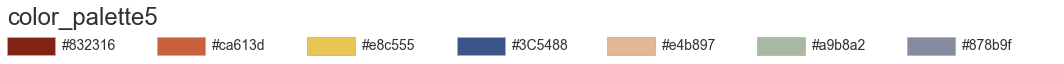

In [116]:
plot_colortable(color_palette, "color_palette5")
plt.show()

In [117]:
color_palette

['#832316', '#ca613d', '#e8c555', '#3C5488', '#e4b897', '#a9b8a2', '#878b9f']

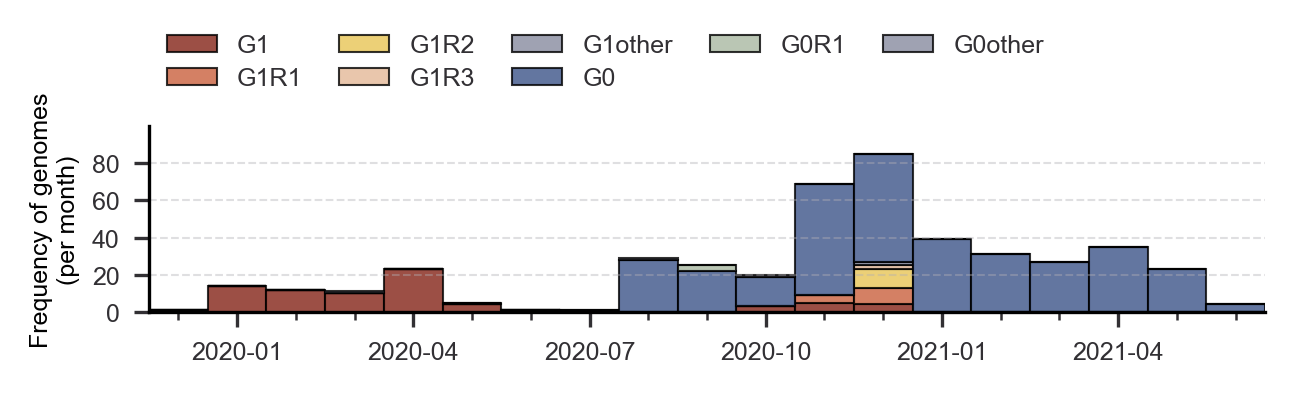

In [130]:
group_order = ['1_1_1_1_1_1_1_1', '0_0_0_0_0_0_0_0', '4_2_3_0_3_2_0_0', '2_2_1_1_2_1_1_1', '3_2_2_1_2_1_1_2', '1_1_1_1_2_1_1_1',
               '0_0_5_0_0_0_0_0', '3_5_1_1_2_1_1_1', '5_4_4_0_4_0_3_3', '6_3_6_0_5_0_2_4', '3_1_2_1_2_1_1_1']
minor_group = ['0_0_5_0_0_0_0_0', '3_5_1_1_2_1_1_1', '5_4_4_0_4_0_3_3', '6_3_6_0_5_0_2_4', '3_1_2_1_2_1_1_1']

group_l = ['G1', 'G1R1', 'G1R2', 'G1R3', 'G1other', 'G0', 'G0R1', 'G0other']
color_l = ['#832316', '#ca613d', '#e8c555', '#e4b897', '#878b9f', '#3C5488', '#a9b8a2', '#878b9f']
group_cmap = dict(zip(group_l, color_l))

countByGroup = pd.crosstab(metainfo.Collection_Date3, metainfo['group2'])[group_l]
cumCountByGroup = countByGroup.cumsum(axis=1)
numMonth, numGroup = countByGroup.shape


x = 0.5 + np.arange(numMonth)
fig, ax = plt.subplots(figsize=(4.2, 1.2), dpi=300, facecolor='#FFFFFF', constrained_layout=True)
for i in range(numGroup):
    y = countByGroup.iloc[:, i]
    if i == 0:
        ax.bar(x, y, width=1, edgecolor='black', color=group_cmap[group_l[i]], linewidth=.5, alpha=.8, label=group_l[i])
    else:
        y_ = cumCountByGroup.iloc[:, i-1]
        ax.bar(x, y, width=1, bottom=y_, edgecolor='black', color=group_cmap[group_l[i]], linewidth=.5, alpha=.8, label=group_l[i])

ax.legend(loc='lower left', bbox_to_anchor=(.0, 1.1) ,fontsize=6, frameon=False, ncol=5)
ax.set_ylabel('Frequency of genomes\n(per month)', fontsize=6)

ax.xaxis.set_major_locator(FixedLocator(np.arange(1.5, numMonth, 3)))
ax.xaxis.set_minor_locator(FixedLocator(np.arange(0.5, numMonth, 1)))

# ax.xaxis.set_major_formatter(format_fn)
ax.set_xticklabels(['2020-01', '2020-04', '2020-07', '2020-10', '2021-01', '2021-04'])
ax.set_xmargin(0)
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=6)
ax.set_yticks(np.arange(0, 100, 20))
ax.set_yticklabels(np.arange(0, 100, 20), fontsize=6)
ax.grid(axis='y', linestyle='--', linewidth=.5, alpha=.4)

# plt.show()
plt.savefig('./results/fig1c.pdf', dpi=300)

### percentage of sampling genomes by genotype and time

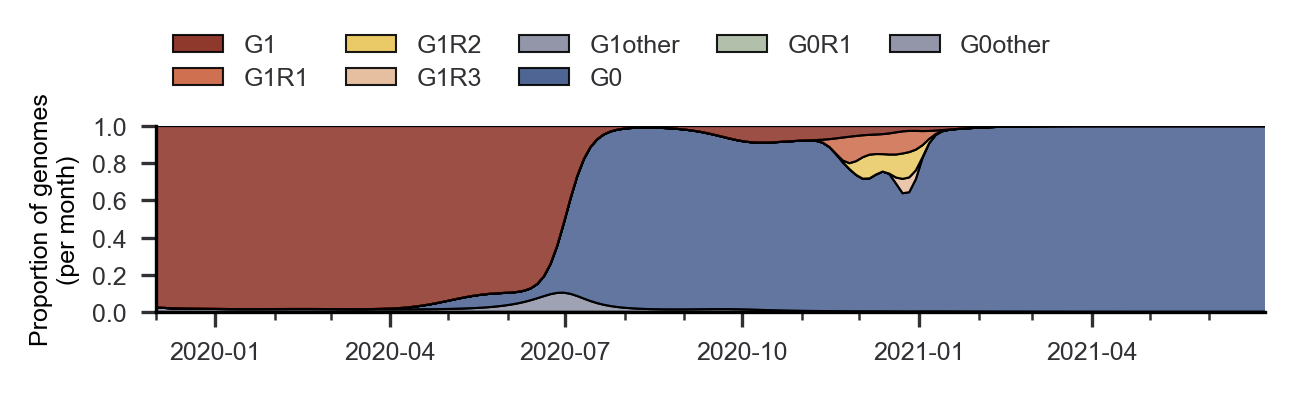

In [137]:
group_l2 = ['G1', 'G1R1', 'G1R2', 'G1R3', 'G0', 'G0other', ]
color_l2 = [group_cmap[group] for group in group_l2]

fig, ax = plt.subplots(figsize=(4.2, 1.2), dpi=300, facecolor='#FFFFFF', constrained_layout=True)
sns.kdeplot(ax=ax, data=metainfo, x="Collection_Date2", hue="group2", hue_order=group_l2, common_norm=True,
            multiple="fill", clip=(0, None), bw_adjust=0.75, linewidth=0.5, alpha=0.8, palette=color_l2, legend=False, edgecolor='black')

import matplotlib.patches as mpatches
host = []
for color, host_ in zip(color_l, group_l):
    host.append(mpatches.Patch(facecolor=color, label=host_, alpha=0.9, linewidth=.5, edgecolor='black'))
plt.legend(handles=host, loc='lower left', bbox_to_anchor=(0, 1.1) ,fontsize=6, frameon=False, ncol=5)

ax.set_ylabel('Proportion of genomes\n(per month)', fontsize=6)
ax.set_xlabel('')

ax.set_xlim(datetime(2019, 12, 1), datetime(2021, 6, 30))

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.setp(ax.get_xticklabels(), rotation=0, fontsize=6)
ax.set_yticks(np.arange(0, 1.2, 0.2))
ax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=6)

# plt.show()
plt.savefig('./results/fig1d.pdf', dpi=300)

# Outbreak data

In [139]:
file_path = 'data/00_original_data/Outbreaks.geojson'
with open(file_path) as f:
    d = json.load(f)

df = pd.DataFrame([event['properties'] for event in d['features']])
df = df.drop_duplicates('outbreakId')
dt = pd.to_datetime(df.startDate)
df2 = df[(dt > datetime(2020, 1, 1)) & (dt < datetime(2021, 7, 1))]
df2.head()

,outbreakId,reportId,diseaseName,diseaseType,startDate,endDate,status,totalOutbreaks,totalCases,locationName,species,animalCategoryLabel,isClusterLabel,latitude,longitude,animalCategory,isCluster
0,77734,17171,Highly pathogenic avian influenza (poultry),H5N8 (HPAI),2020-10-20,2020-11-20,resolved,1,1130,Dusaj,Birds,Domestic,No,55.271169,53.588276,domestic,False
1,86197,32785,Highly pathogenic avian influenza (poultry),H5N8 (HPAI),2020-10-10,2021-04-23,resolved,1,282957,Bujskaya,Birds,Domestic,No,58.500626,41.481995,domestic,False
2,78203,17171,Highly pathogenic avian influenza (poultry),H5N8 (HPAI),2020-10-25,2020-12-10,resolved,1,35,Yagodny,Birds,Domestic,No,59.750359,65.080077,domestic,False
3,85192,40266,Highly pathogenic influenza A viruses (Inf. wi...,H5N8 (HPAI non. Plt),2021-03-28,2021-03-29,resolved,1,1,Juankoski,Whooper Swan,Wild,No,63.066000,28.330000,wild,False
4,80986,40048,Highly pathogenic influenza A viruses (Inf. wi...,H5N8 (HPAI non. Plt),2020-12-15,2020-12-15,resolved,1,1,Nr Loch Bee,Mute Swan,Wild,No,57.350000,-7.360000,wild,False


<AxesSubplot:>

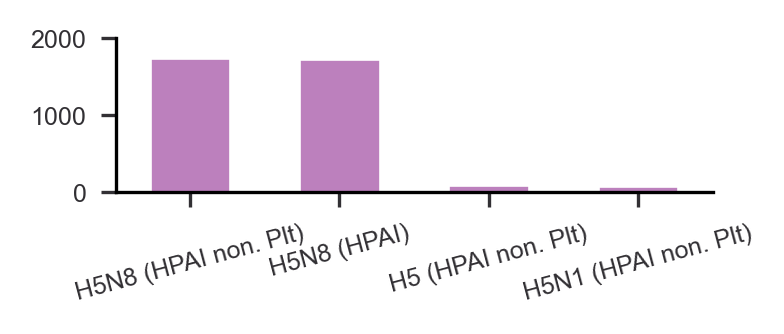

In [140]:
df2.diseaseType.value_counts().plot.bar(figsize=(2.5, 1), rot=15)

## wild birds infection in first wave

In [141]:
df2[(df2.startDate < '2020-07-01') & (df2.animalCategory == 'wild')][['diseaseType', 'startDate', 'locationName', 'species']]

,diseaseType,startDate,locationName,species
1466,H5N8 (HPAI non. Plt),2020-03-24,Limbach-Oberfrohna,"Mergus merganser,Hirundinidae (incognita),Haem..."
1469,H5N8 (HPAI non. Plt),2020-03-20,Frohburg,Eurasian buzzard (common buzzard)
1501,H5N8 (HPAI non. Plt),2020-01-16,Spree-Neiße,Greater White-fronted Goose
1781,H5N8 (HPAI non. Plt),2020-01-06,Stary Uscimow,Northern Goshawk
1858,H5N8 (HPAI),2020-01-27,Bojnice,"Anas versicolor,Anas bernieri,Pelecanus onocro..."
2120,H5N8 (HPAI non. Plt),2020-01-27,Near Gilgal,Bonelli's Eagle


## wild birds infection between first wave and second wave

In [142]:
df2[(df2.startDate < '2020-10-01') & ('2020-07-01' <= df2.startDate) & (df2.animalCategory == 'wild')][['diseaseType', 'startDate', 'locationName', 'species']]

,diseaseType,startDate,locationName,species
1022,H5N8 (HPAI non. Plt),2020-09-06,Malinovoe,Mallard
1025,H5N8 (HPAI non. Plt),2020-08-21,Maloe Bezymyannoe,Anatidae (unidentified)
1038,H5N8 (HPAI non. Plt),2020-08-17,Bannikovo,Tufted Duck
1040,H5N8 (HPAI non. Plt),2020-09-06,Chencher’,"Aythya ferina,Anas strepera,Anas querquedula"
1041,H5N8 (HPAI non. Plt),2020-08-28,Mokhovik,Mute Swan
1051,H5N8 (HPAI non. Plt),2020-09-07,Gor’koe,Anatidae (unidentified)
1054,H5N8 (HPAI non. Plt),2020-09-07,Kamyshenka,Anatidae (unidentified)
1059,H5N8 (HPAI non. Plt),2020-08-14,Sitnikovo,Anatidae (unidentified)
1067,H5N8 (HPAI non. Plt),2020-08-21,Sibirskoe,Anatidae (unidentified)


In [143]:
# 区域范围
LON1 = -20
LON2 = 160
LAT1 = -30
LAT2 = 90


# 使用矩阵分隔网格
# 生成网格ID column_num等于列数，row_num等于行数
def generalID(lon,lat,column_num,row_num):
    # 若在范围外的点，返回-1
    if lon <= LON1 or lon >= LON2 or lat <= LAT1 or lat >= LAT2:
        return -1
    # 把经度范围根据列数等分切割
    column = (LON2 - LON1)/column_num
    # 把纬度范围根据行数数等分切割
    row = (LAT2 - LAT1)/row_num
    # 得到二维矩阵坐标索引，并转换为一维ID，即： 列坐标区域（向下取整）+ 1 + 行坐标区域 * 列数
    return int((lon-LON1)/column)+ 1 + int((lat-LAT1)/row) * column_num



In [144]:
tmp1 = df2[['longitude', 'latitude', 'startDate']].copy()
tmp2 = metainfo[['Longitude', 'Latitude', 'Collection_Date']].reset_index(drop=True).copy()
tmp2.columns = ['longitude', 'latitude', 'startDate']

tmp1['index'] = tmp1.apply(lambda x: generalID(x['longitude'], x['latitude'], 20, 20), axis=1)
tmp1 = tmp1[tmp1['index'] > 0].copy()
tmp1['date'] = pd.to_datetime(tmp1['startDate']).map(lambda x: x.to_period('M'))
tmp2['index'] = tmp2.apply(lambda x: generalID(x['longitude'], x['latitude'], 20, 20), axis=1)
tmp2['date'] = pd.to_datetime(tmp2['startDate']).map(lambda x: x.to_period('M'))

tmp1 = tmp1.groupby(['date', 'index'], as_index=False).size()
tmp2 = tmp2.groupby(['date', 'index'], as_index=False).size()

In [145]:
tmp3 = pd.merge(tmp1, tmp2, left_on=['date', 'index'], right_on=['date', 'index'], how='left').fillna(0)
tmp3

,date,index,size_x,size_y
0,2020-01,188,1,0.0
1,2020-01,207,1,0.0
2,2020-01,245,6,2.0
3,2020-01,264,3,2.0
4,2020-01,265,18,10.0
...,...,...,...,...
206,2021-06,263,5,0.0
207,2021-06,264,1,0.0
208,2021-06,265,3,0.0
209,2021-06,284,3,0.0


In [146]:
tmp3[tmp3['size_y'] != 0]

,date,index,size_x,size_y
2,2020-01,245,6,2.0
3,2020-01,264,3,2.0
4,2020-01,265,18,10.0
7,2020-02,264,2,1.0
8,2020-02,265,11,11.0
...,...,...,...,...
192,2021-05,245,5,9.0
195,2021-05,264,7,3.0
196,2021-05,265,2,10.0
203,2021-06,225,3,1.0


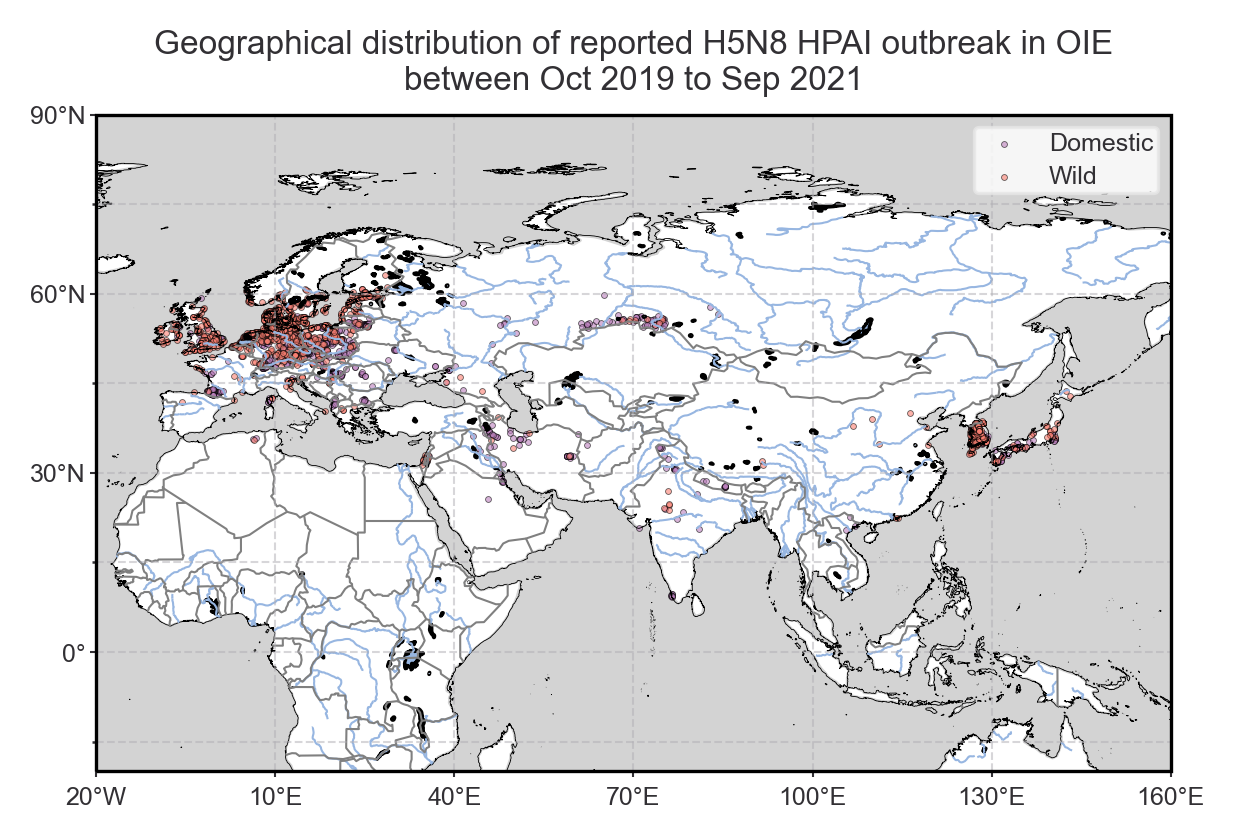

In [169]:
fig = plt.figure(figsize=(4, 4), dpi=300)

proj = ccrs.PlateCarree()
ax = fig.add_subplot(111, projection=proj)
# ax.stock_img()

ax.add_feature(cfeature.COASTLINE.with_scale('10m'), lw=0.2)
ax.add_feature(cfeature.OCEAN, facecolor='lightgrey')
# ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES.with_scale('50m'), edgecolor='black')
ax.add_feature(cfeature.RIVERS.with_scale('50m'), lw=0.5)
ax.add_feature(cfeature.BORDERS, edgecolor='grey', lw=0.5)

ax.set_xticks(np.arange(-20, 180 + 30, 30), crs=proj)
ax.set_xticks(np.arange(-20, 180 + 30, 30), minor=True, crs=proj)
ax.set_yticks(np.arange(-30, 90 + 30, 30), crs=proj)
ax.set_yticks(np.arange(-30, 90 + 15, 15), minor=True, crs=proj)

# 利用Formatter格式化刻度标签
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# ax.gridlines(linestyle='--')
ax.set_extent((-20, 160, -20, 90), crs=proj)
ax.set_title('Geographical distribution of reported H5N8 HPAI outbreak in OIE\nbetween Oct 2019 to Sep 2021', fontsize=8)


idx = 0
for group, df_i in df2.groupby('animalCategoryLabel'):
    plt.scatter(df_i.longitude, df_i.latitude, transform=proj, s=2, c=f'C{idx}', label=group, alpha=0.6, linewidths=0.2)
    idx += 1

plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.setp(ax.get_xticklabels(), fontsize=6)
plt.setp(ax.get_yticklabels(), fontsize=6)

plt.legend(fontsize=6)
plt.show()

In [170]:
dt = pd.to_datetime(df2.startDate)
dt2 = dt.map(lambda x: f'{x:%Y-%m}')

In [253]:
np.arange(-20, 190, 20)

array([-20,   0,  20,  40,  60,  80, 100, 120, 140, 160, 180])

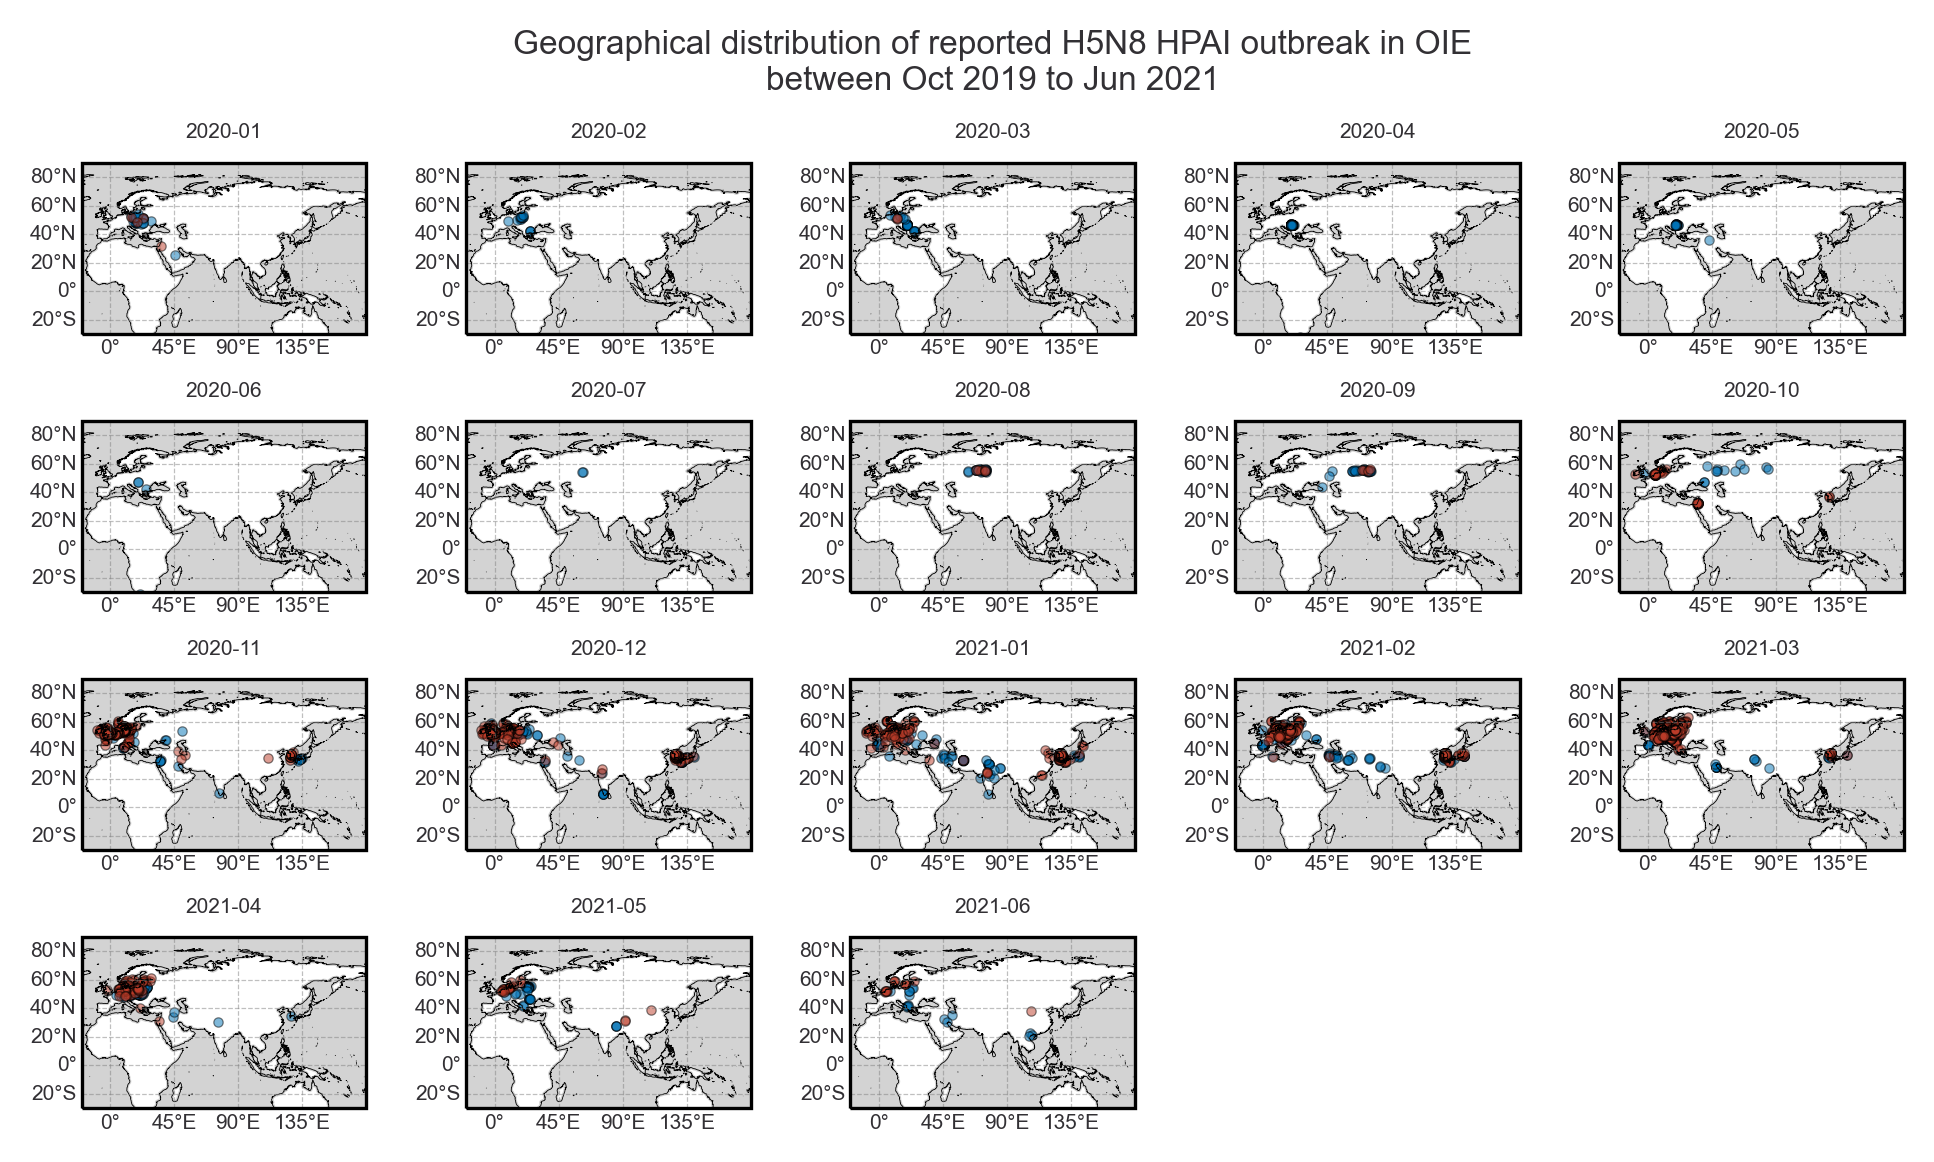

In [274]:
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter, LongitudeLocator, LatitudeLocator
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np
import matplotlib.ticker as mticker


color_m = {'Wild': '#BC3C29', 'Domestic': '#0072B5'}

fig = plt.figure(figsize=(6.75, 4.), constrained_layout=False, dpi=300)

gs = fig.add_gridspec(4, 5)
proj = ccrs.PlateCarree()

for i, (dt_i, df_i) in enumerate(df2.groupby(dt2)):

    ax = fig.add_subplot(gs[i // 5, i % 5], projection=proj)

    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), lw=0.2)
    ax.add_feature(cfeature.OCEAN, facecolor='lightgrey')
    
    ax.set_extent((-20, 180, -30, 90), crs=proj)
    gl = ax.gridlines(crs=proj, draw_labels=True, linewidth=.3, color='gray', alpha=0.5, linestyle='--', dms=True)
    gl.top_labels = False
    gl.right_labels = False
    
    gl.xlocator = mticker.FixedLocator([0, 45, 90, 135, 180])
    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    
    gl.xlabel_style = {'size': 5}
    gl.ylabel_style = {'size': 5}

    ax.set_title(dt_i, fontsize=5)
    for group, df_j in df_i.groupby('animalCategoryLabel'):
        ax.scatter(df_j.longitude, df_j.latitude, transform=proj, s=5, c=color_m[group], label=group, alpha=0.5, linewidths=0.3)    

plt.subplots_adjust(hspace=0.05, top=0.9, wspace=0.35, left=0.05, right=0.95, bottom=0.05)
plt.suptitle('Geographical distribution of reported H5N8 HPAI outbreak in OIE\nbetween Oct 2019 to Jun 2021', fontsize=8, fontstyle='italic')

plt.savefig('./results/Sfig1a.pdf')

plt.show()

In [223]:
host_map = {'Other': 'Wild', 'Seabird': 'Wild', 'Waterfowl': 'Wild', 'Dom-gal': 'Domestic', 'Dom-ans': 'Domestic', 'Wild-gal': 'Wild', 'Human': 'Domestic'}
metainfo['host3'] = metainfo['host2'].map(host_map)

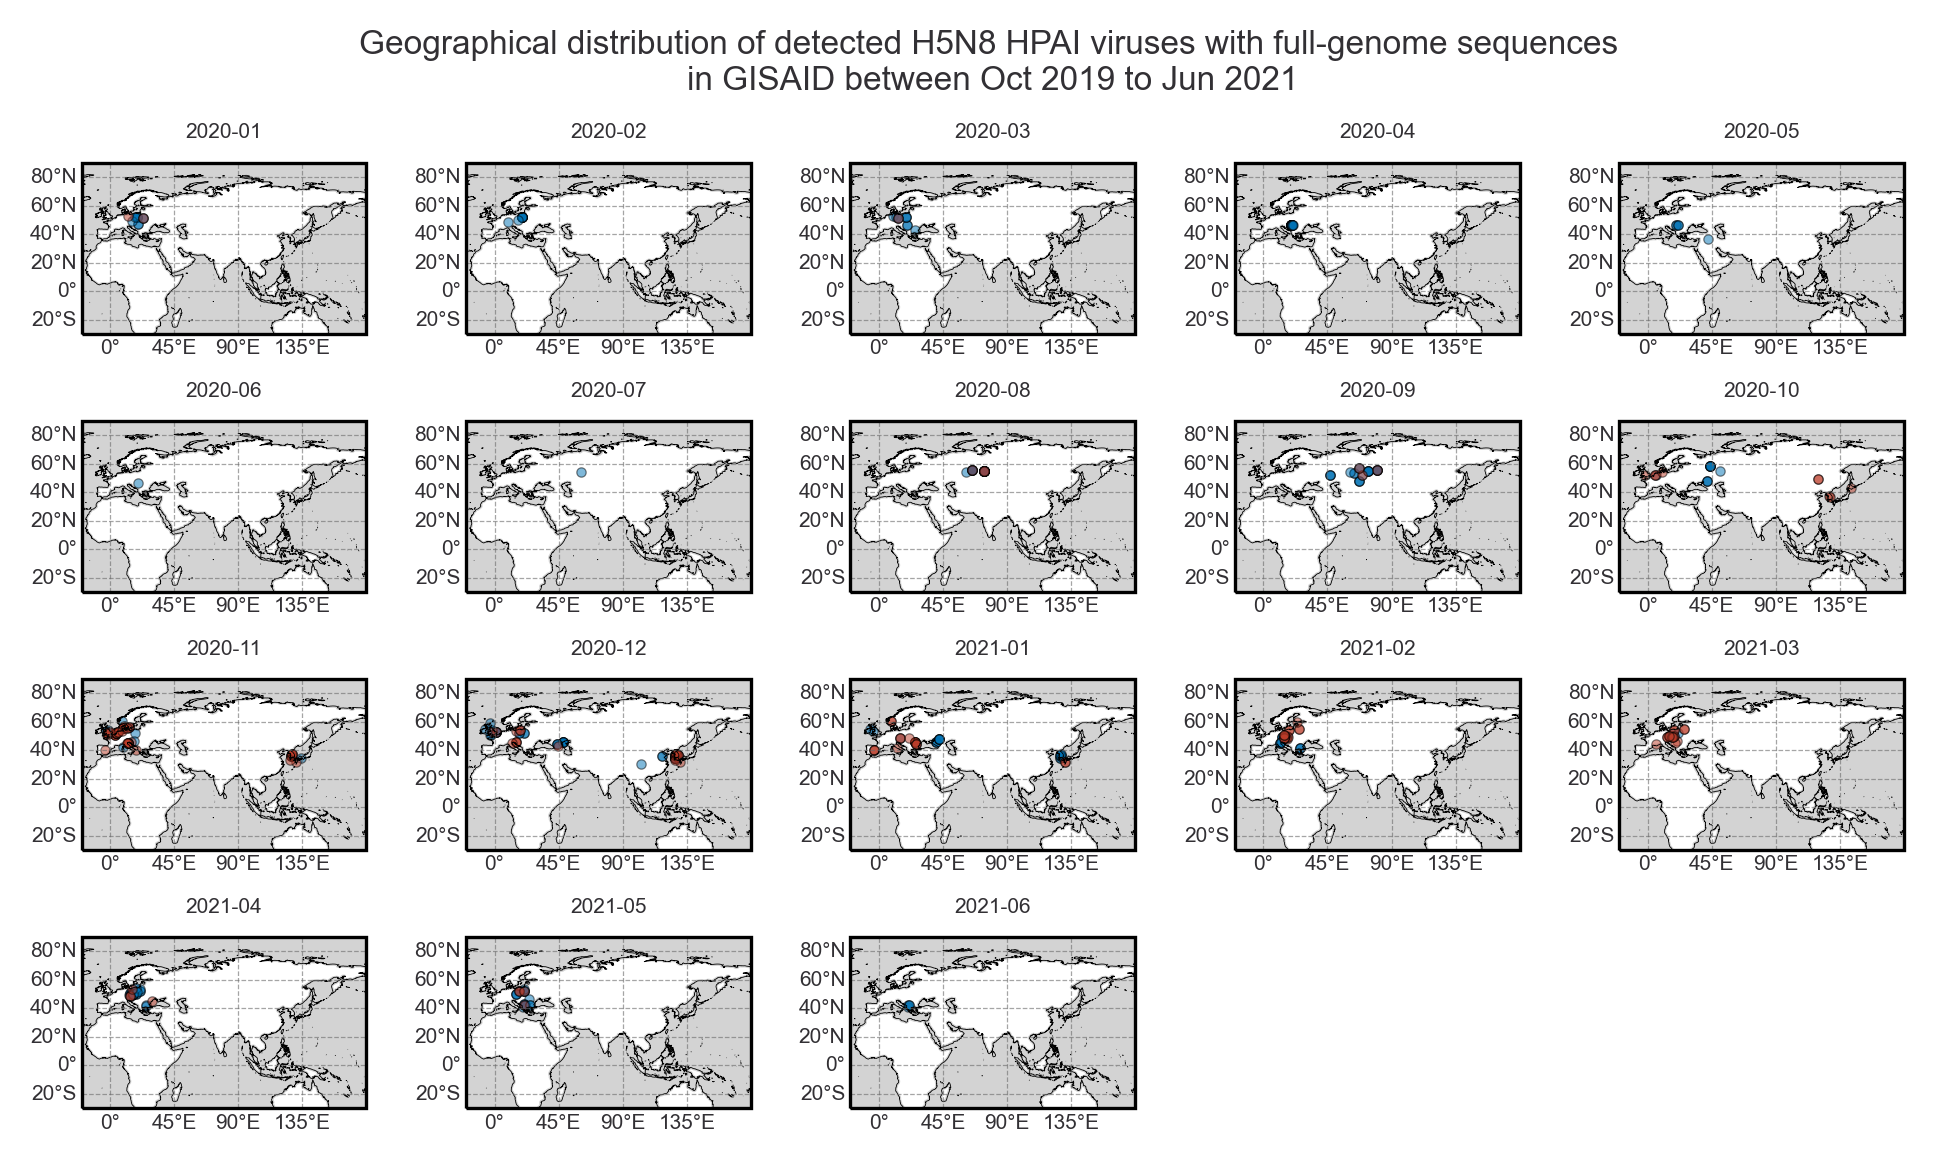

In [275]:
proj = ccrs.PlateCarree()
color_m = {'Wild': '#BC3C29', 'Domestic': '#0072B5'}

fig = plt.figure(figsize=(6.75, 4.), constrained_layout=False, dpi=300)


for i, (dt_i, df_i) in enumerate(metainfo.groupby('Collection_Date3')):
    if i == 0:
        continue
    
    i = i-1

    ax = fig.add_subplot(gs[i // 5, i % 5], projection=proj)

    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), lw=0.2)
    ax.add_feature(cfeature.OCEAN, facecolor='lightgrey')
    
    ax.set_extent((-20, 180, -30, 90), crs=proj)
    gl = ax.gridlines(draw_labels=True, crs=proj, linestyle='--', linewidth=.3, color='dimgrey', alpha=.6)
    gl.top_labels = False
    gl.right_labels = False

    gl.xlocator = mticker.FixedLocator([0, 45, 90, 135, 180])
    gl.ylocator = LatitudeLocator()
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    
    gl.xlabel_style = {'size': 5}
    gl.ylabel_style = {'size': 5}

    ax.set_title(dt_i, fontsize=5)

    for idx, (group, df_j) in enumerate(df_i.groupby('host3')):
        ax.scatter(df_j.Longitude, df_j.Latitude, transform=proj, s=5, c=color_m[group], label=group, alpha=0.5, linewidths=0.3)

plt.subplots_adjust(hspace=0.05, top=0.9, wspace=0.35, left=0.05, right=0.95, bottom=0.05)
plt.suptitle('Geographical distribution of detected H5N8 HPAI viruses with full-genome sequences \nin GISAID between Oct 2019 to Jun 2021', fontsize=8, fontstyle='italic')

plt.savefig('./results/Sfig1b.pdf')
plt.show()